In [1]:
import itertools
import seaborn
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
seaborn.set_context("poster")
palette = itertools.cycle(seaborn.color_palette())
seaborn.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
inputpath = Path("/Volumes/GoogleDrive-113348191183663233095/My Drive/Projects/2019-EPSCoR_Postdoc/Spectral library/")

In [6]:
grass_hyspexDF = pd.read_csv(inputpath / 'BC_05/envi_grass_hyspex.txt', 
                             skiprows=12, 
                             delimiter=r"\s+",
                             header=None,
                             names=[
                                 'wavelength (nm)', 'sample01', 'sample02', 'sample03', 'sample04', 
                                 'sample05', 'sample06', 'sample07', 'sample08', 'sample09', 'sample10'])
grass_avirisDF = pd.read_csv(inputpath / 'BC_05/envi_grass_aviris.txt', 
                             skiprows=7, 
                             delimiter=r"\s+",                             
                             header=None,
                             names=[
                                 'wavelength (nm)', 'sample01', 'sample02', 'sample03', 'sample04', 
                                 'sample05',])
grass_psrDF = pd.read_csv(inputpath / 'for_Edward_SpectralEvoluation/1596061_00031.sed', 
            skiprows=27, delimiter=r"\s+",
           header=None, names=['wavelength (nm)', 'sample01'],
           usecols=[0,1])

for ii in range(1,11):
    colname = f'sample{str(ii).zfill(2)}'
    grass_hyspexDF[colname] = grass_hyspexDF[colname] / 10000
grass_psrDF['sample01'] = grass_psrDF['sample01'] / 100

In [16]:
picea_g_hyspexDF = pd.read_csv(inputpath / 'BC_05/envi_picea_g.txt', 
                             skiprows=14, 
                             delimiter=r"\s+",
                             header=None,
                             names=[
                                 'wavelength (nm)', 'White spruce', '_sample02', '_sample03', '_sample04', 
                                 '_sample05', '_sample06', '_sample07', '_sample08', '_sample09', '_sample10', 
                                 '_sample11', '_sample12'])
picea_m_hyspexDF = pd.read_csv(inputpath / 'BC_05/envi_picea_m.txt', 
                             skiprows=14, 
                             delimiter=r"\s+",
                             header=None,
                             names=[
                                 'wavelength (nm)', 'Black spruce', '_sample02', '_sample03', '_sample04', 
                                 '_sample05', '_sample06', '_sample07', '_sample08', '_sample09', '_sample10', 
                                 '_sample11', '_sample12'])
betula_hyspexDF = pd.read_csv(inputpath / 'BC_05/envi_betula.txt', 
                             skiprows=12, 
                             delimiter=r"\s+",
                             header=None,
                             names=[
                                 'wavelength (nm)', 'Paper birch', '_sample02', '_sample03', '_sample04', 
                                 '_sample05', '_sample06', '_sample07', '_sample08', '_sample09', '_sample10'])
pop_trem_hyspexDF = pd.read_csv(inputpath / 'BC_05/envi_pop_trem.txt', 
                             skiprows=14, 
                             delimiter=r"\s+",
                             header=None,
                             names=[
                                 'wavelength (nm)', 'Quaking aspen', '_sample02', '_sample03', '_sample04', 
                                 '_sample05', '_sample06', '_sample07', '_sample08', '_sample09', '_sample10', 
                                 '_sample11', '_sample12'])

for dframe in [betula_hyspexDF, pop_trem_hyspexDF, picea_m_hyspexDF, picea_g_hyspexDF]:
    maximum = dframe.shape[1]
    for ii in range(2, maximum):
        colname = f'_sample{str(ii).zfill(2)}'
        dframe[colname] = dframe[colname] / 10000

In [17]:
pop_trem_hyspexDF

,wavelength (nm),Quaking aspen,_sample02,_sample03,_sample04,_sample05,_sample06,_sample07,_sample08,_sample09,_sample10,_sample11,_sample12
0,410.359985,6.0,0.0006,0.0000,0.0009,0.0033,0.0026,0.0089,0.0109,0.0070,0.0109,0.0089,0.0026
1,413.529999,56.0,0.0056,0.0021,0.0012,0.0040,0.0104,0.0097,0.0124,0.0059,0.0124,0.0097,0.0104
2,416.700012,39.0,0.0039,0.0019,0.0013,0.0059,0.0031,0.0117,0.0085,0.0092,0.0085,0.0117,0.0031
3,419.869995,18.0,0.0018,0.0025,0.0069,0.0001,0.0087,0.0187,0.0093,0.0102,0.0093,0.0187,0.0087
4,423.040009,90.0,0.0090,0.0044,0.0012,0.0070,0.0057,0.0189,0.0092,0.0034,0.0092,0.0189,0.0057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,2487.280029,1545.0,0.1545,1.4556,1.4994,0.4966,1.5000,1.5000,1.0365,1.5000,1.0365,1.5000,1.5000
455,2492.719971,4996.0,0.4996,0.8473,0.2796,0.7696,1.5000,0.2927,1.3261,1.1593,1.3261,0.2927,1.5000
456,2498.149902,2696.0,0.2696,0.0663,0.1112,0.3955,0.0267,0.8806,1.1127,1.5000,1.1127,0.8806,0.0267
457,2503.590088,2361.0,0.2361,0.6196,0.3154,1.5000,0.3603,0.6414,1.2889,0.6721,1.2889,0.6414,0.3603


In [18]:
def get_mask(mydf):
    mask = (((mydf['wavelength (nm)'] > 1340) & 
            (mydf['wavelength (nm)'] < 1480)) | 
            ((mydf['wavelength (nm)'] > 1760) & 
            (mydf['wavelength (nm)'] < 1960)) | 
           (mydf['wavelength (nm)'] > 2350))
    return mask

def plot_spectra(
    specdf, 
    title="Reflectance spectra",
    indexcol='wavelength (nm)',
    plot_sections=False,
    color=None,
    lw=2, ylim=(0, .75)):
    
    plotargs = {
        'x': indexcol,
        'ylabel': 'reflectance',
        'ylim': ylim, 
        'title': title,
        'lw': lw
        }
    if color:
        plotargs['color']: color
    
    fig, ax = plt.subplots(figsize=(15, 10))
    specdf.mask(get_mask(specdf)).plot(
        ax=ax,
        **plotargs
    ) 
    if plot_sections:
        plt.axvline(x=690, color='grey', ls=':', lw=3)
        plt.axvline(x=1400, color='dimgrey', ls=':', lw=3)
        plt.text(380, 0.66, "VIS", fontsize=36, color='grey', fontweight="bold")
        plt.text(950, 0.66, "NIR", fontsize=36, color='grey', fontweight="bold")
        plt.text(1750, 0.66, "SWIR", fontsize=36, color='grey', fontweight="bold")
    ax.get_legend().remove()

/Users/cwaigl/miniconda3/envs/python38_geo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x13cf86df0> has a label of '_sample02' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/cwaigl/miniconda3/envs/python38_geo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x13e677250> has a label of '_sample03' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/cwaigl/miniconda3/envs/python38_geo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x13e677670> has a label of '_sample04' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/cwaigl/miniconda3/envs/python38_geo/lib/pytho

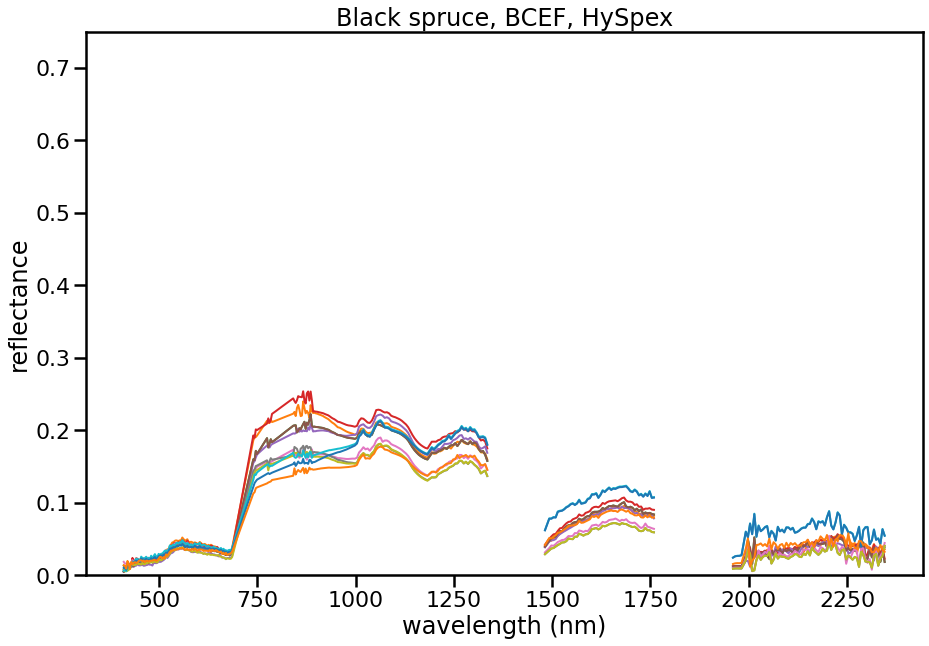

In [19]:
plot_spectra(picea_m_hyspexDF, title="Black spruce, BCEF, HySpex")

Text(1550, 0.66, 'SWIR')

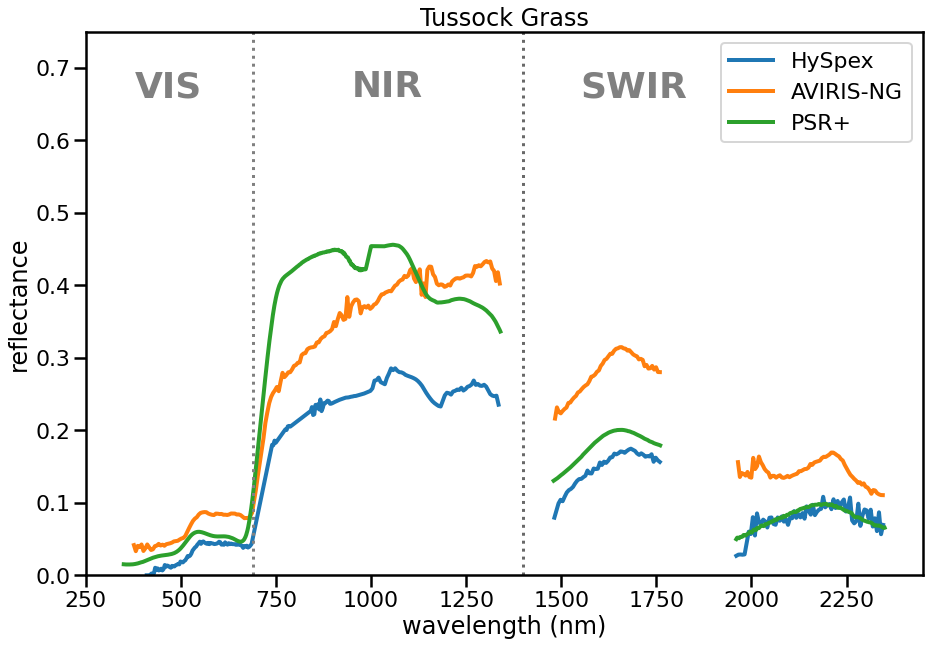

In [255]:
fig, ax = plt.subplots(figsize=(15, 10))

grass_hyspexDF.mask(get_mask(grass_hyspexDF)).plot(
    x='waavelength (nm)', y='sample01', 
    ax=ax,
    label='HySpex', ylabel='reflectance',
    ylim=(0, .75), title="Tussock Grass", lw=4) 
grass_avirisDF.mask(get_mask(grass_avirisDF)).plot(x='wavelength (nm)', y='sample03', 
    ax=ax, label='AVIRIS-NG', lw=4)
grass_psrDF.mask(get_mask(grass_psrDF)).plot(x='wavelength (nm)', y='sample01', ax=ax, label='PSR+', lw=4)

plt.axvline(x=690, color='grey', ls=':', lw=3)
plt.axvline(x=1400, color='dimgrey', ls=':', lw=3)
plt.text(380, 0.66, "VIS", fontsize=36, color='grey', fontweight="bold")
plt.text(950, 0.66, "NIR", fontsize=36, color='grey', fontweight="bold")
plt.text(1550, 0.66, "SWIR", fontsize=36, color='grey', fontweight="bold")

In [256]:
graph = ax.get_figure()
graph.savefig("tussock_grass_comp.png", dpi=150, bbox_inches="tight")

In [20]:
picea_g_hyspexDF.drop(columns=['_sample10'], inplace=True)

/Users/cwaigl/miniconda3/envs/python38_geo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x13c9feeb0> has a label of '_sample02' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/cwaigl/miniconda3/envs/python38_geo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x13ca4b1f0> has a label of '_sample03' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/cwaigl/miniconda3/envs/python38_geo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x13ca4b610> has a label of '_sample04' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/cwaigl/miniconda3/envs/python38_geo/lib/pytho

Text(0.5, 1.0, 'HySpex reflectance spectra (ATCOR-4 & BREFCOR)')

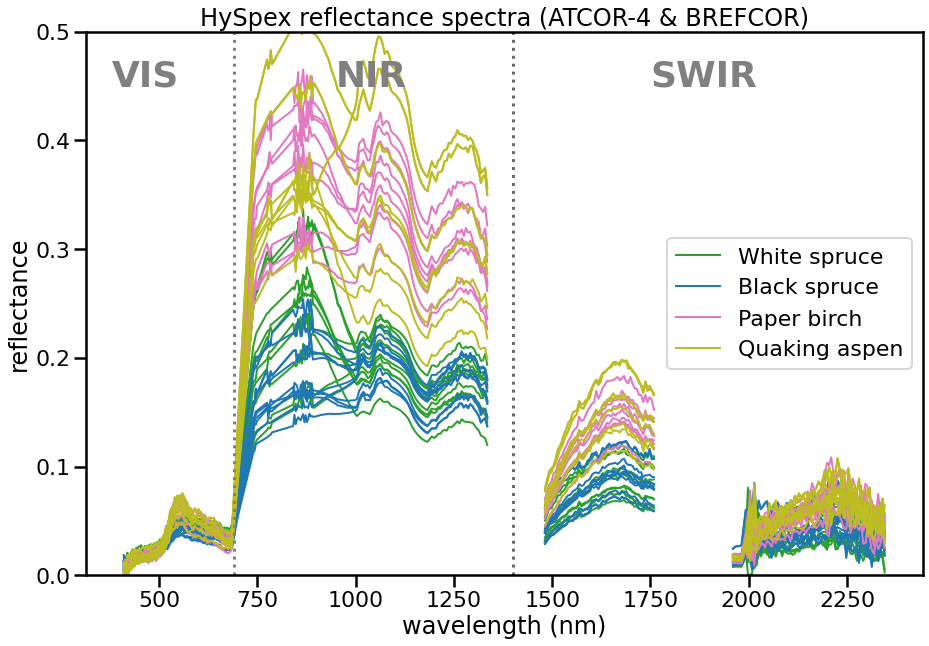

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))

picea_g_hyspexDF.mask(get_mask(grass_hyspexDF)).plot(
    x='wavelength (nm)', 
    ax=ax,
    label='White spruce', ylabel='reflectance',
    ylim=(0, .5),  
    color=seaborn.color_palette()[2], lw=2) 
picea_m_hyspexDF.mask(get_mask(picea_m_hyspexDF)).plot(
    x='wavelength (nm)', 
    ax=ax,
    label='Black spruce', ylabel='reflectance',
    ylim=(0, .5), 
    color=seaborn.color_palette()[0], lw=2) 
betula_hyspexDF.mask(get_mask(betula_hyspexDF)).plot(
    x='wavelength (nm)', 
    ax=ax,
    label='HySpex', ylabel='reflectance',
    ylim=(0, .5), 
    color=seaborn.color_palette()[6], lw=2)  
pop_trem_hyspexDF.mask(get_mask(pop_trem_hyspexDF)).plot(
    x='wavelength (nm)', 
    ax=ax,
    label='HySpex', ylabel='reflectance',
    ylim=(0, .5), 
    color=seaborn.color_palette()[8], lw=2)  

plt.axvline(x=690, color='grey', ls=':', lw=3)
plt.axvline(x=1400, color='dimgrey', ls=':', lw=3)
plt.text(380, 0.45, "VIS", fontsize=36, color='grey', fontweight="bold")
plt.text(950, 0.45, "NIR", fontsize=36, color='grey', fontweight="bold")
plt.text(1750, 0.45, "SWIR", fontsize=36, color='grey', fontweight="bold")
ax.legend(loc='center right')
ax.set_title("HySpex reflectance spectra (ATCOR-4 & BREFCOR)")

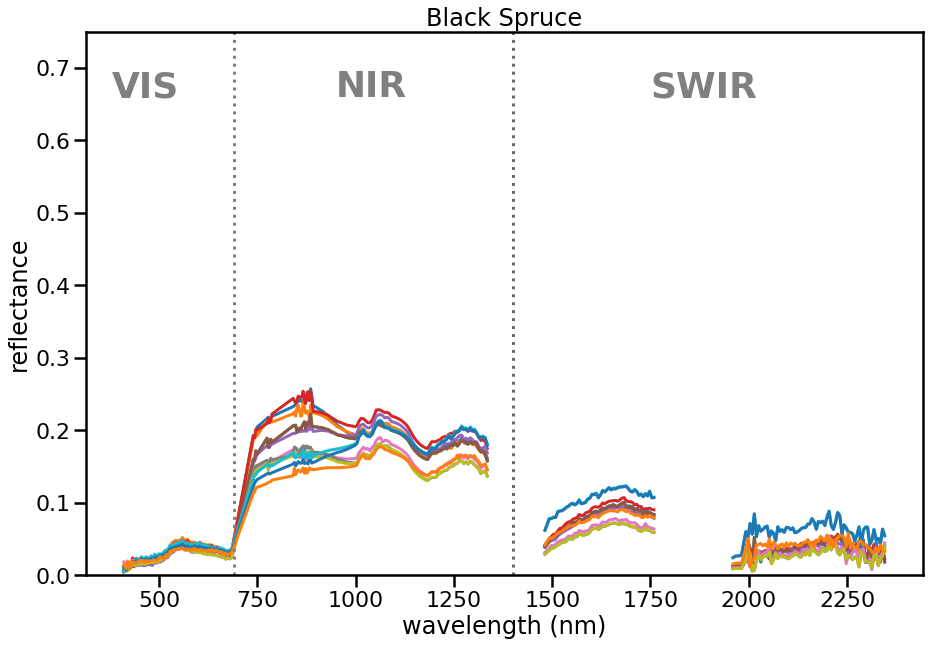

In [266]:
fig, ax = plt.subplots(figsize=(15, 10))

picea_m_hyspexDF.mask(get_mask(picea_m_hyspexDF)).plot(
    x='wavelength (nm)', 
    ax=ax,
    label='HySpex', ylabel='reflectance',
    ylim=(0, .75), title="Black Spruce", 
#    color=seaborn.color_palette()[0], lw=4) 
)
plt.axvline(x=690, color='grey', ls=':', lw=3)
plt.axvline(x=1400, color='dimgrey', ls=':', lw=3)
plt.text(380, 0.66, "VIS", fontsize=36, color='grey', fontweight="bold")
plt.text(950, 0.66, "NIR", fontsize=36, color='grey', fontweight="bold")
plt.text(1750, 0.66, "SWIR", fontsize=36, color='grey', fontweight="bold")
ax.get_legend().remove()

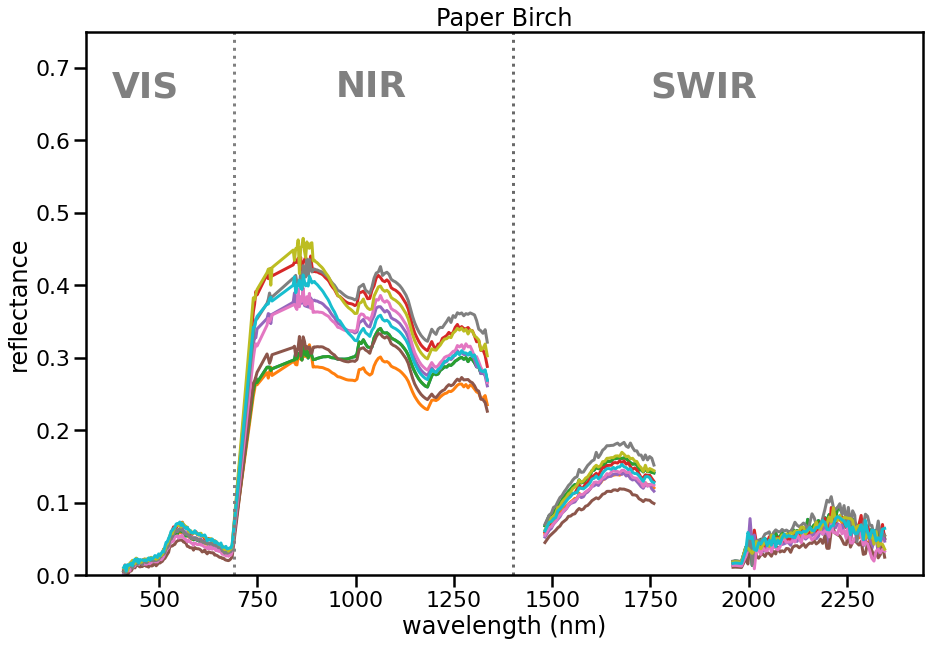

In [268]:
fig, ax = plt.subplots(figsize=(15, 10))

betula_hyspexDF.mask(get_mask(betula_hyspexDF)).plot(
    x='wavelength (nm)', 
    ax=ax,
    label='HySpex', ylabel='reflectance',
    ylim=(0, .75), title="Paper Birch", 
#    color=seaborn.color_palette()[5], lw=4)  
)
plt.axvline(x=690, color='grey', ls=':', lw=3)
plt.axvline(x=1400, color='dimgrey', ls=':', lw=3)
plt.text(380, 0.66, "VIS", fontsize=36, color='grey', fontweight="bold")
plt.text(950, 0.66, "NIR", fontsize=36, color='grey', fontweight="bold")
plt.text(1750, 0.66, "SWIR", fontsize=36, color='grey', fontweight="bold")
ax.get_legend().remove()

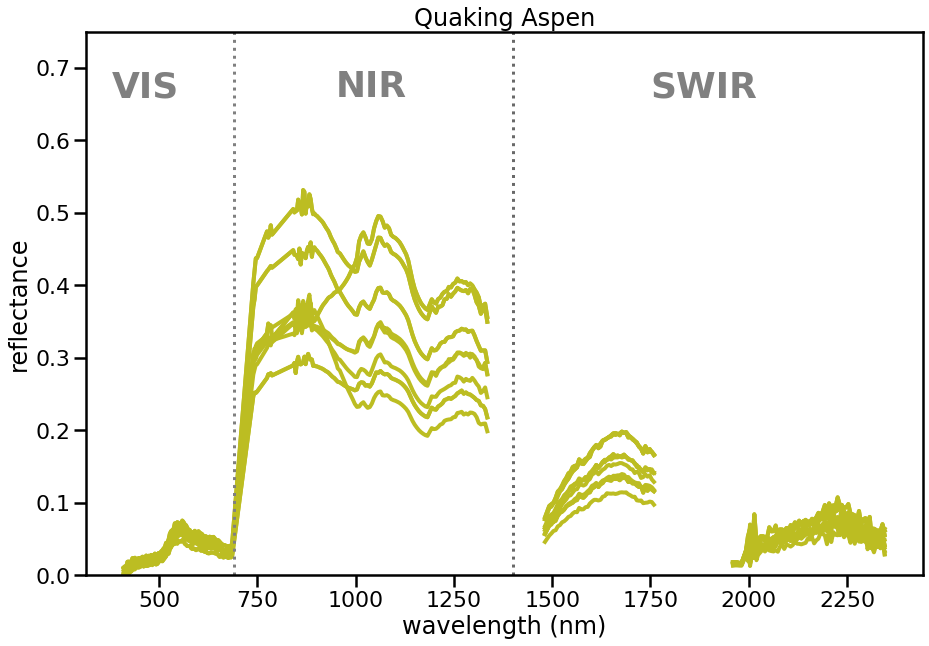

In [252]:
fig, ax = plt.subplots(figsize=(15, 10))

pop_trem_hyspexDF.mask(get_mask(pop_trem_hyspexDF)).plot(
    x='wavelength (nm)', 
    ax=ax,
    label='HySpex', ylabel='reflectance',
    ylim=(0, .75), title="Quaking Aspen", 
    color=seaborn.color_palette()[8], lw=4)  
plt.axvline(x=690, color='grey', ls=':', lw=3)
plt.axvline(x=1400, color='dimgrey', ls=':', lw=3)
plt.text(380, 0.66, "VIS", fontsize=36, color='grey', fontweight="bold")
plt.text(950, 0.66, "NIR", fontsize=36, color='grey', fontweight="bold")
plt.text(1750, 0.66, "SWIR", fontsize=36, color='grey', fontweight="bold")
ax.get_legend().remove()